In [1]:
import pandas as pd
from backtest import backtest_dca

import config as cfg

In [2]:
!python load_data.py

Loading data for ['SPY'] from 2026-02-10 to 2026-02-13...
[*********************100%***********************]  1 of 1 completed
Loading data for {'BTC': 'BTC-USD', 'ETH': 'ETH-USD', 'BNB': 'BNB-USD', 'XRP': 'XRP-USD', 'SOL': 'SOL-USD', 'DOT': 'DOT-USD', 'ADA': 'ADA-USD', 'TON': 'TON-USD', 'LINK': 'LINK-USD', 'AVAX': 'AVAX-USD'} from 2026-02-10 to 2026-02-13...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[****************

# crypto

In [3]:
df_crypto = pd.read_csv("data/crypto.csv", index_col=0, parse_dates=True)
df_crypto = df_crypto.dropna()
df_crypto

,BTC,ETH,BNB,XRP,SOL,DOT,ADA,TON,LINK,AVAX
Date,,,,,,,,,,
2026-02-10,68793.960938,2019.497437,619.570312,1.399487,82.915482,1.282279,0.261670,0.005027,8.561299,8.743785
2026-02-11,66991.968750,1940.621338,607.187134,1.368019,79.254250,1.254615,0.255552,0.005027,8.311589,8.630200
2026-02-12,66221.843750,1946.940674,613.710938,1.362070,78.348442,1.281533,0.264224,0.004839,8.402665,8.888180


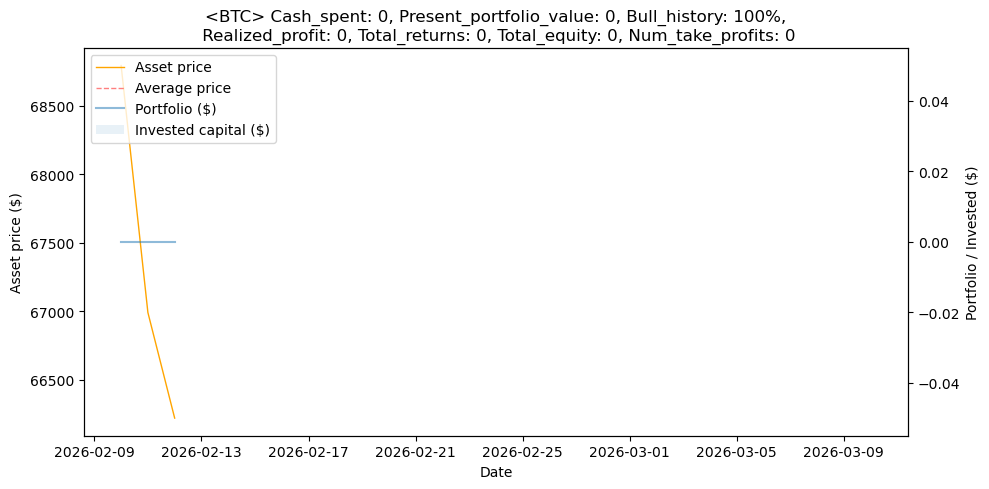

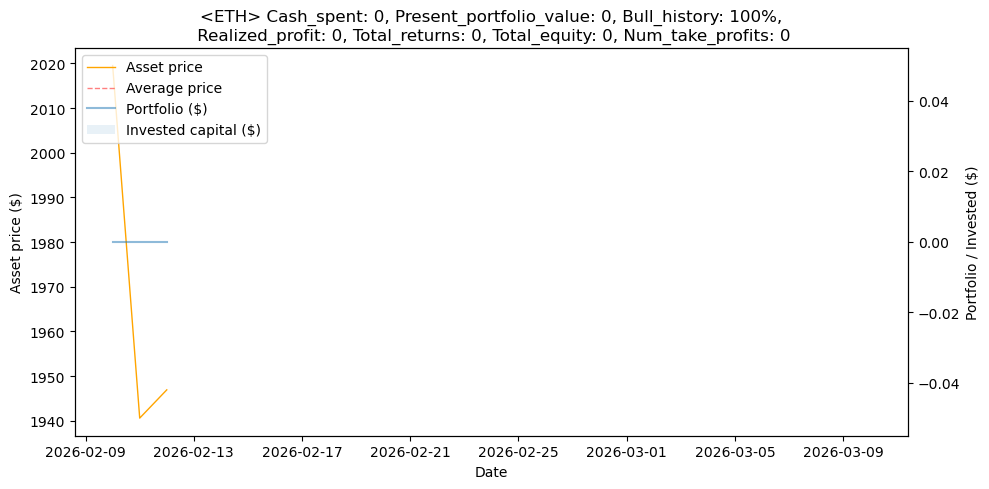

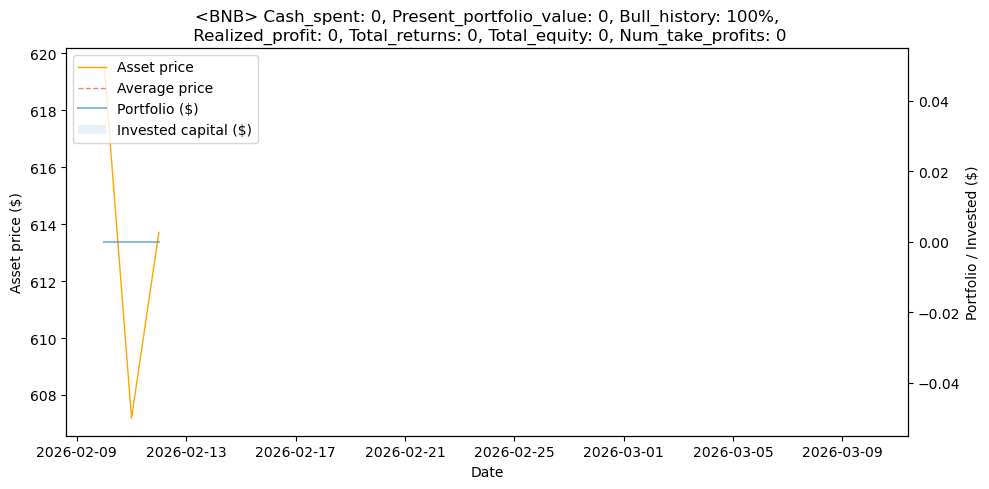

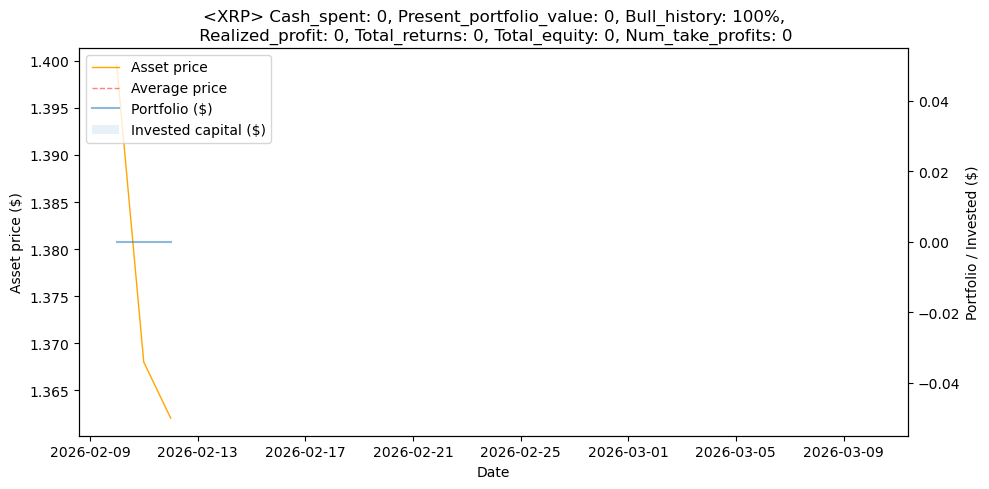

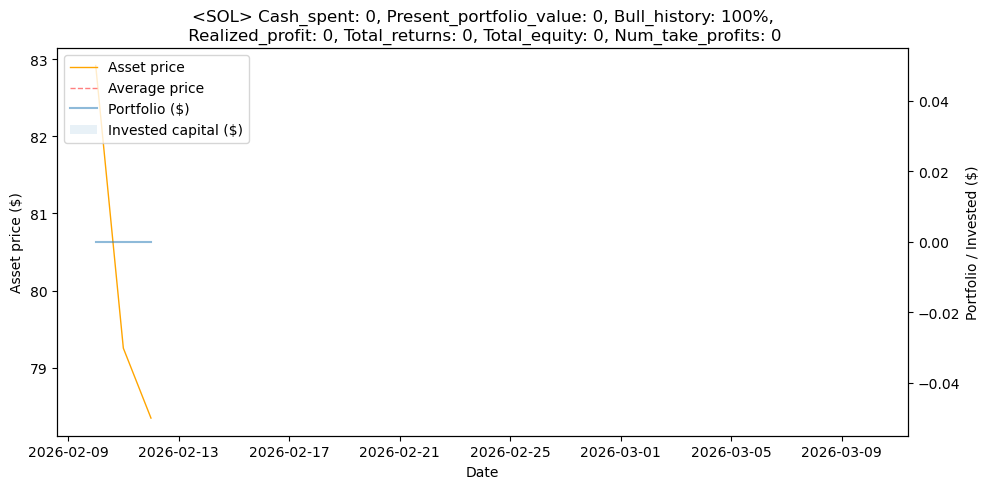

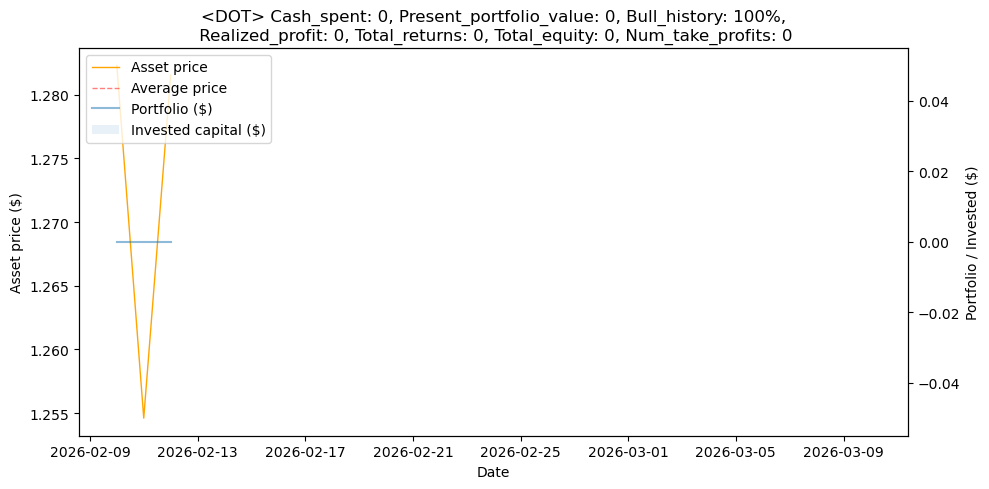

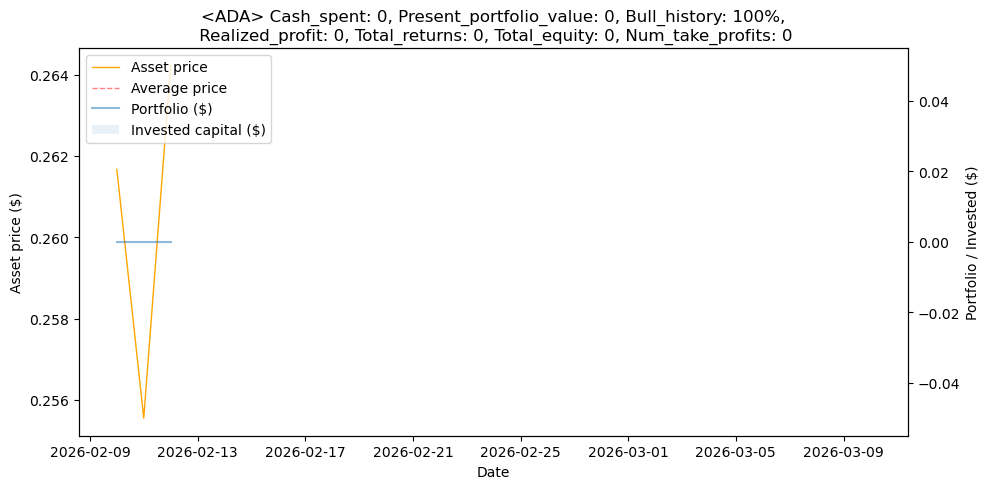

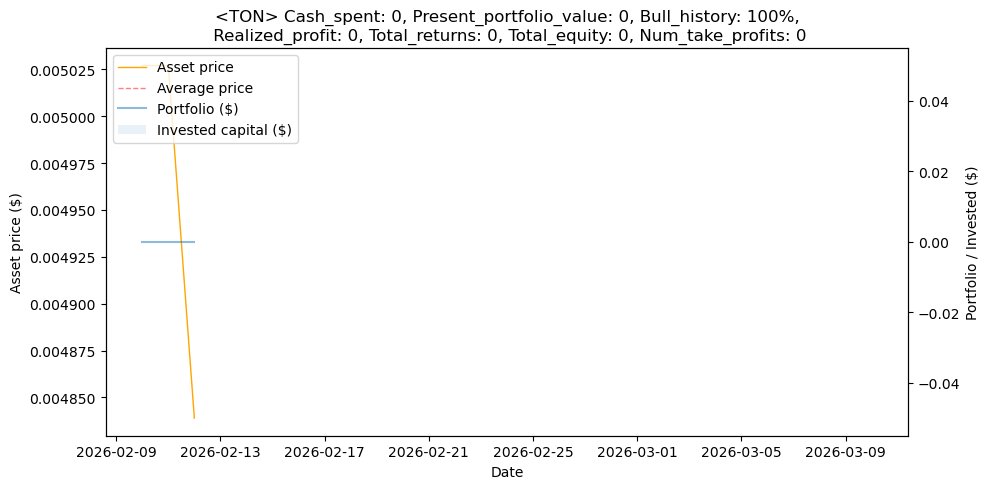

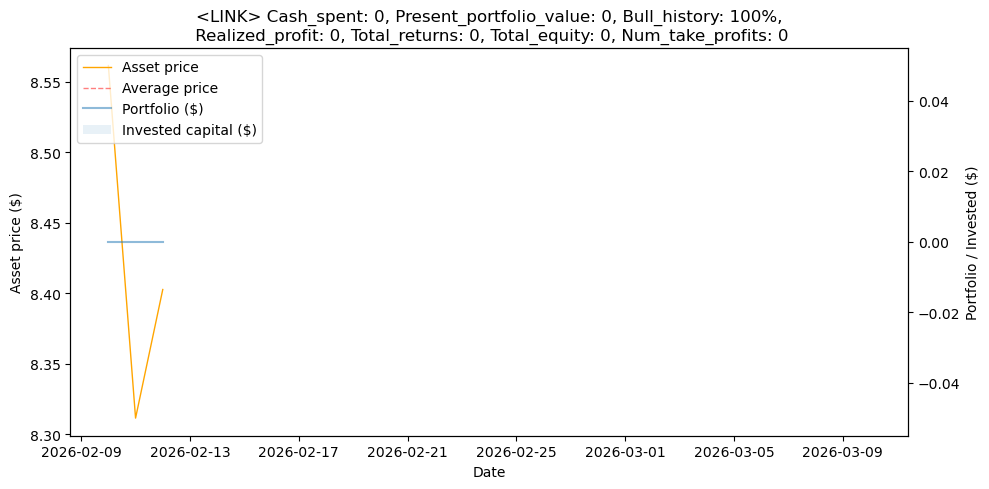

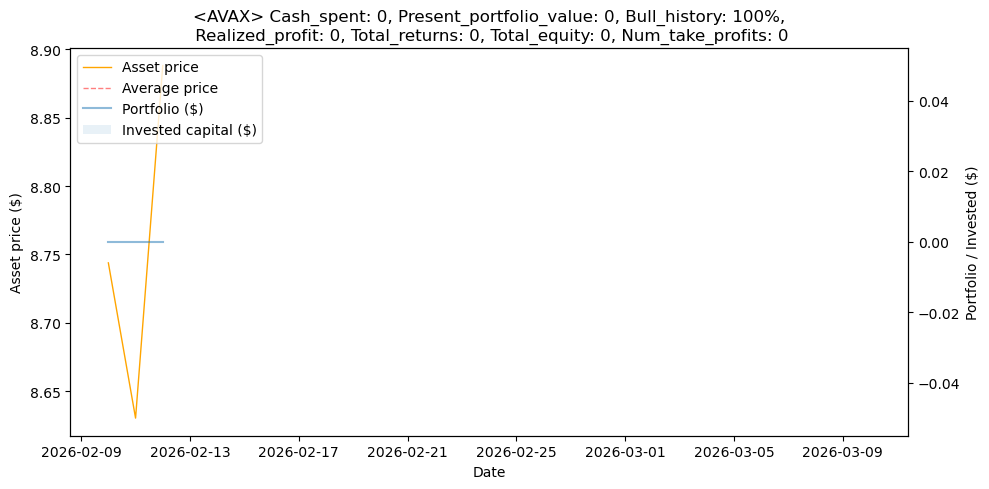

Total invested: $0.00
Total profit: $0.00
Total equity: $0.00


In [4]:
total_invested = 0
total_profit = 0
total_equity = 0

for token in df_crypto.columns:
    token_prices = df_crypto[token]

    result, metrics = backtest_dca(
        target=token,
        prices=token_prices,
        buy_amount=cfg.crypto_regular_amount,
        freq=cfg.crypto_freq,
        fee=cfg.crypto_fee,
        profit_multiple=cfg.crypto_profit_multiple,
        cooldown_days=cfg.crypto_cooldown_days,
        plot=True
    )
    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")

# stocks

In [5]:
df_stocks = pd.read_csv("data/stocks.csv", index_col=0, parse_dates=True)
df_stocks = df_stocks.dropna()
df_stocks

,SPY
Date,
2026-02-10,692.119995
2026-02-11,691.960022
2026-02-12,681.270020


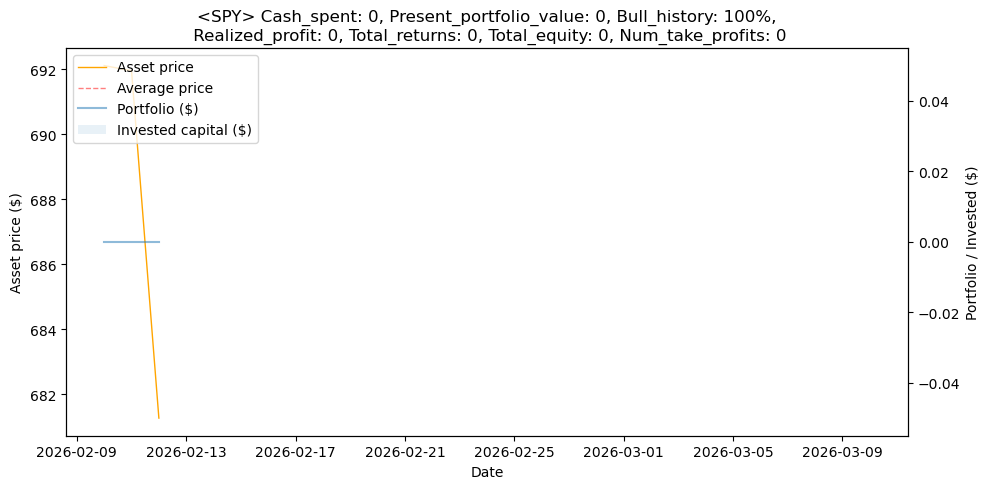

Total invested: $0.00
Total profit: $0.00
Total equity: $0.00


In [6]:
total_invested = 0
total_profit = 0
total_equity = 0

for stock in df_stocks.columns:
    stock_prices = df_stocks[stock]

    result, metrics = backtest_dca(
        target=stock,
        prices=stock_prices,
        buy_amount=cfg.stock_regular_amount,
        freq=cfg.stock_freq,
        fee=cfg.stock_fee,
        profit_multiple=cfg.stock_profit_multiple,
        cooldown_days=cfg.stock_cooldown_days,
        plot=True
    )

    total_invested += metrics['Cash_spent']
    total_profit += metrics['Realized_profit']
    total_equity += metrics['Total_equity']

print(f"Total invested: ${total_invested:.2f}")
print(f"Total profit: ${total_profit:.2f}")
print(f"Total equity: ${total_equity:.2f}")